# METU Technology and Regulation II - Big Data
This material was made for the Technology and regulation II. course of METU. Contact debreczenim@mnb.hu for permission to use.

## What is "Big Data"?

A buzzword (mostly).

Lots of definitions online, look them up if you are interested.
However, our current digital economy runs on data (lots of it).

Consider social media *in 2017*:

- Snapchat users share 527,760 photos
- Users watch 4,146,600 YouTube videos
- 456,000 tweets are sent on Twitter
- Instagram users post 46,740 photos

### on average, every minute of every day [[1](https://www.forbes.com/sites/bernardmarr/2018/05/21/how-much-data-do-we-create-every-day-the-mind-blowing-stats-everyone-should-read)]

**The amount of data generated and the speed of it's creation is ever increasing.**

## Why bother processing it?

- Profitable for the companies
- Targeted ads make content free for users
- Granular metrics can better support the decision-making processes

### Facebook's annual ad revenue in million dollars [[2](https://www.statista.com/statistics/271258/facebooks-advertising-revenue-worldwide/)]
<img src="pics/facebook-ad-revenue.png" alt="facebook annual ad revenue in million dollars" />

## What are the downsides?

For consumers:
- Privacy invasive
- Potential security threat

For the companies:
- Bad PR
- Costly infrastructure if not monetized well

Facebook's data collection: https://dataethics.eu/facebooks-data-collection-sharelab/

[Map of Facebook's pipeline](https://labs.rs/wp-content/uploads/2016/08/FacebookFactory-01.gif)

Data collection in our everyday life: https://crackedlabs.org/dl/CrackedLabs_Christl_CorporateSurveillance.pdf

## How to process it?

As with everything in software: **it depends...**
- on the amount,
- the structure/format,
- the frequency,
- the sensitivity
- etc. 

of the data. Designing the pipelines and architecture best suited for each use-case is a complex task.

## Supporting hardware

- Vertical scaling of compute can not keep up with the rate of data creation
- Modern CPU-s are multi-core and can run multiple processes in parallel
- Modern large-scale data pipelines consist of multiple servers
- These require specialised software to utilize the performance gains

### CPU benchmark scores (Passmark) [[3](https://www.cpubenchmark.net/year-on-year.html)]
<img src="pics/cpu-performance.png" alt="cpu average performance throughout the years" />


### Cloud infrastructure

- Cloud is also used as a buzzword
- Oversimplified: Cloud = lots of computers available for renting 
- In realitiy: specialized servers + software + service etc.
- Virtual machines communicate with eachother to process data

#### Amazon's and Netflix's [microservices](https://en.wikipedia.org/wiki/Microservices) architecture
<img src="pics/microservices.webp" alt="amazon and netflix microservice architecture graph" />

### Horizontal vs Vertical scaling

- Cost effective
- Individual components are cheaper
- More elastic (can be scaled on demand)
- Additional complexity

#### Layered infrastructure (oversimplified)
<img src="pics/cloud-infra.png" alt="Layered architecture of the cloud" />

## Specialised software

- Needs to process data in a distributed and parallel way

<img src="pics/hadoop-arch.gif" alt="Master-slave relationship" />

[img source](https://data-flair.training/blogs/how-hadoop-works-internally/)

- Hadoop MapReduce (MapReduce paradigm)
- Apache Spark (DAG with High Level tasks)
- Dask (DAG with Low Level tasks)


### Map-reduce task structure [[4](https://data-flair.training/blogs/hadoop-mapreduce-tutorial/)]
1. HDFS: Hadoop Distributed File System (fault tolerant distributed file system)
2. Map: Key-value store (like a telephone book)

User defined function can be executed in the map phase, which will be applied to every key-value pair, thus producing an intemediate result
    
3. [Shuffle & Sort](https://data-flair.training/blogs/shuffling-and-sorting-in-hadoop/): Preprocesses the data to make the reduction phase faster

4. Reduce: Data is aggregated on a key level

User defined function can be executed to "unify" the result for each key

<img src="pics/map-reduce.webp" alt="Map-reduce engine graph" />

### DAG structure

- Directed acyclic graph of tasks
- No synchronisation because of the lack of phases
- Lower latencysynchronisation

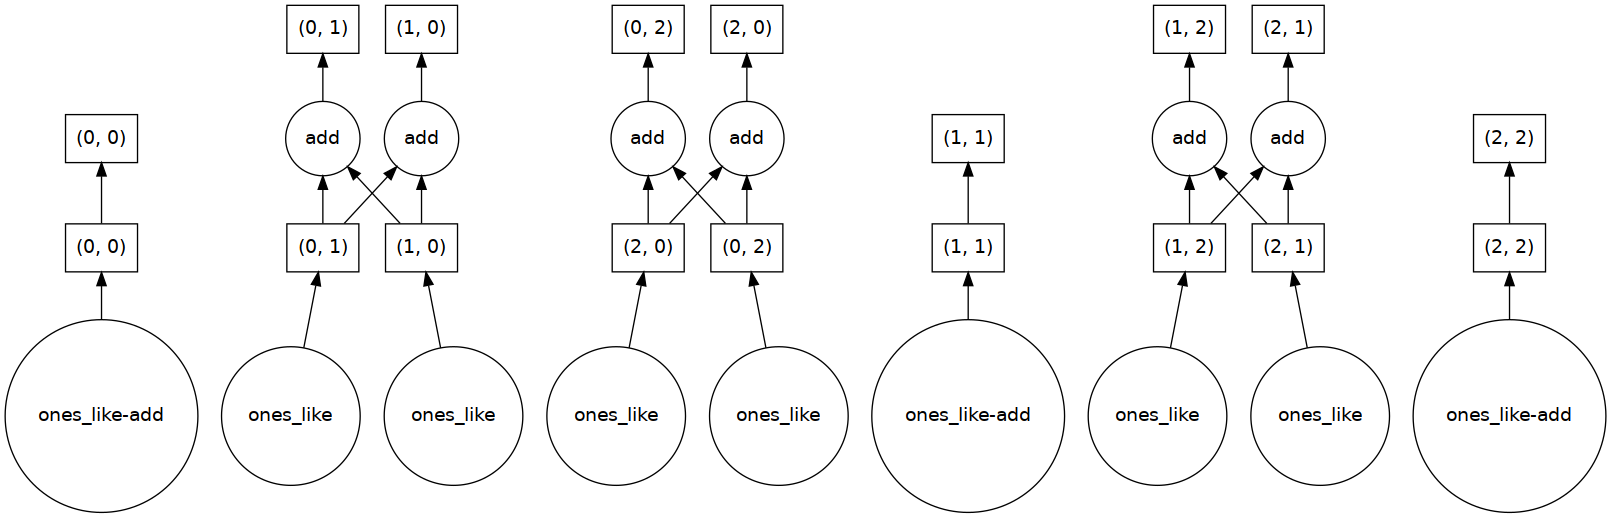

In [19]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))

y = x + x.T
## in case of Dask, the graph is comprised of low level tasks
y.visualize(optimize_graph=True)

in case of spark the graph contains high level tasks, leading to a less flexibility
(spark has a low level graph as well, but it is not exposed externally)

<img src="pics/spark-dag.png" alt="DAG of the tasks in spark" />

[more DAGS](https://www.databricks.com/blog/2015/06/22/understanding-your-spark-application-through-visualization.html)

### Scaling

- All three solutions can scale well, but spark is a de-facto replacement for MapReduce
- MapReduce is not capable of real time analysis, as it was created for batch processing

#### Spark vs Dask

- Spark is more establised than Dask
- Both are known to scale from a single node up to thousands
- Dask offers more flexibility and is more lightweight
- Spark covers more of the usual data processing needs alone

## Data formats

- JSON - Javascript Object Notation
- CSV - Comma Separated Values
- Parquet 
- Relational Database
- Document Database

### JSON [[5](https://www.json.org/json-en.html)]

- Mix of dictionaries and lists
- Key value pairs

```JSON
{
    "Name": "Máté",
    "Employer": "National Bank of Hungary",
    "Title": "Junior Analyst",
    "Co-workers": 10,
    "Higher-ups": ["John Doe", "Jane Doe"]
}
```

- Self describing
- Human readable
- Slow: 
    - not parallelizable
    - large memory requirement
    - no compression
- Great flexibility

### CSV [[6](https://www.ietf.org/rfc/rfc4180.txt)]

- optional parameters: headers, charset
- list of records
- each record consists of values separated by commas

```CSV
Name, Employer, Title, Co-workers, Higher-up
Máté, National Bank of Hungary, Junior Analyst, 10, John Doe
Máté, National Bank of Hungary, Junior Analyst, 10, Jane Doe
```

- Can be self describing
- Human readable
- No compression
- Easier to parallelize than JSON
- Rigid columnar format

### Parquet [[7](https://parquet.apache.org/)]

- Columnar
- Non-human readable
- Well parallelizable
- Compressed by default
- Designed for efficient data storage and retreival

sample data downloaded from [here](https://github.com/Teradata/kylo/tree/master/samples/sample-data/parquet)

### Relational databases (RDB)

- Columnar, logical relations modeled by different tables
- Highly optimized storage and querying possible
- Most commonly queried by structured query language (SQL)
- Depending on workload, data, hardware etc. RDBs can scale to Terabytes of data
(replicas for read heavy workloads, vertical partitioning for write heavy workloads)

### Document databases

- Key-value store (can be JSON)
- Documents stored in collections
- Collections usually schemaless -> more flexibilty
- Easier to scale horizontally (distributed model is built in)

In [56]:
import datetime
import datashader as ds
import datashader.transfer_functions as tf
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from colorcet import fire

read_times = []

for i in range(10):
    # parquet
    before = datetime.datetime.now()
    userdata_df = pd.read_parquet('data/userdata.parq')
    after = datetime.datetime.now()
    time_ms = (after-before).total_seconds() * 1000
    read_times.append([time_ms, 'parquet'])
    # csv
    before = datetime.datetime.now()
    userdata_df = pd.read_csv('data/userdata.csv')
    after = datetime.datetime.now()
    time_ms = (after-before).total_seconds() * 1000
    read_times.append([time_ms, 'csv'])
    # json
    before = datetime.datetime.now()
    userdata_df = pd.read_json('data/userdata.json')
    after = datetime.datetime.now()
    time_ms = (after-before).total_seconds() * 1000
    read_times.append([time_ms, 'json'])

In [57]:
read_times_df = pd.DataFrame({'time':[item[0] for item in read_times], 'format': [item[1] for item in read_times]})
read_times_df

,time,format
0,18.518,parquet
1,34.311,csv
2,63.235,json
3,12.736,parquet
4,14.721,csv
5,39.520,json
6,12.125,parquet
7,14.551,csv
8,39.539,json
9,13.021,parquet


Text(0.5, 1.0, 'Average read times (5000 records)')

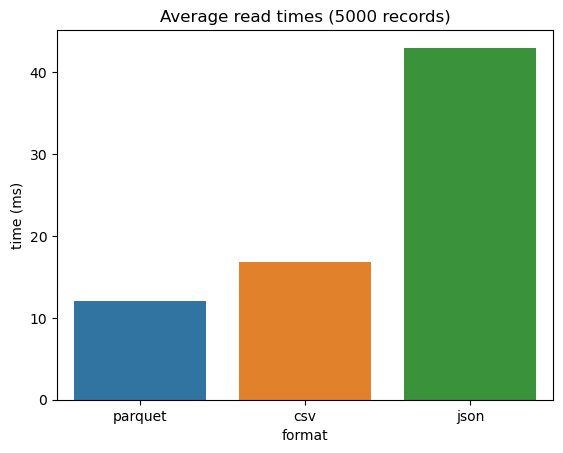

In [59]:
read_times_df = read_times_df.groupby('format').mean().reset_index().sort_values(by='time')
sns.barplot(read_times_df, x = 'format', y = 'time')
plt.ylabel('time (ms)')
plt.title('Average read times (5000 records)')

In [67]:
!ls data -lah | grep userdata
print('\nparquet:')
!ls data/userdata.parq -lah

-rw-r--r-- 1 matee matee 715K Mar  2 10:03 userdata.csv
-rw-r--r-- 1 matee matee 1.3M Mar  2 10:03 userdata.json
drwxr-xr-x 2 matee matee 4.0K Mar  2 10:00 userdata.parq

parquet:
total 568K
drwxr-xr-x 2 matee matee 4.0K Mar  2 10:00 .
drwxr-xr-x 5 matee matee 4.0K Mar  2 10:03 ..
-rw-r--r-- 1 matee matee 111K Mar  2 09:59 userdata1.parquet
-rw-r--r-- 1 matee matee 110K Mar  2 09:59 userdata2.parquet
-rw-r--r-- 1 matee matee 111K Mar  2 10:00 userdata3.parquet
-rw-r--r-- 1 matee matee 111K Mar  2 10:00 userdata4.parquet
-rw-r--r-- 1 matee matee 111K Mar  2 10:00 userdata5.parquet


## Pandas dataframes
Tabular data, similar to excel sheets. Makes common calculations easy, by providing a user frendly api.

**Works well on "small" data.**

In [5]:
passing_dataset = {
  'cars': ['BMW', 'Volvo', 'Ford'],
  'passings': [3, 7, 2]
}

passing_df = pd.DataFrame(passing_dataset)
passing_df

,cars,passings
0,BMW,3
1,Volvo,7
2,Ford,2


In [6]:
price_dataset = {
    'cars': ['Volvo', 'Ford', 'BMW', 'Hyundai'],
    'price':[1000, 2000, 3000, 4000]
}
price_df = pd.DataFrame(price_dataset)
price_df

,cars,price
0,Volvo,1000
1,Ford,2000
2,BMW,3000
3,Hyundai,4000


In [7]:
merged_df = pd.merge(price_df, passing_df, on='cars', how='outer')
merged_df

,cars,price,passings
0,Volvo,1000,7.0
1,Ford,2000,2.0
2,BMW,3000,3.0
3,Hyundai,4000,NaN


In [8]:
merged_df['price_to_passing_ratio'] = merged_df['price'] / merged_df['passings']
merged_df

,cars,price,passings,price_to_passing_ratio
0,Volvo,1000,7.0,142.857143
1,Ford,2000,2.0,1000.000000
2,BMW,3000,3.0,1000.000000
3,Hyundai,4000,NaN,NaN


In [9]:
merged_df.loc[merged_df['price_to_passing_ratio'] == merged_df['price_to_passing_ratio'].min()]

,cars,price,passings,price_to_passing_ratio
0,Volvo,1000,7.0,142.857143


## Dask dataframes

Provides the same/similar API as pandas for handling tabular data.

Dask dataframes use pandas dataframes under the hood and operations on them are mapped to operations on the underlying pandas dataframes.
However, **the operations on the pandas dataframes are performed lazily and in parallel**, as dask is optimized for handling *large* amounts of data.

### The dataset: [[OSM 1 billion](https://examples.pyviz.org/osm/osm-1billion.html)]

1 billion rows of GPS coordinates collected by volunteers' devices for the open source project Open Street Maps.
The original dataset contains latitude and longitude data, but this sample was converted to mercartor coordinates
by the pyviz team.

In [ ]:
gps_df = pd.read_parquet('data/osm-1billion.parq')
gps_df

In [68]:
gps_df = dd.read_parquet('data/osm-1billion.parq')
gps_df

,x,y
npartitions=119,,
,float32,float32
,...,...
...,...,...
,...,...
,...,...


In [69]:
gps_df = gps_df.mean()
gps_df

Dask Series Structure:
npartitions=1
x    float32
y        ...
dtype: float32
Dask Name: dataframe-mean, 360 tasks

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417281 to fit


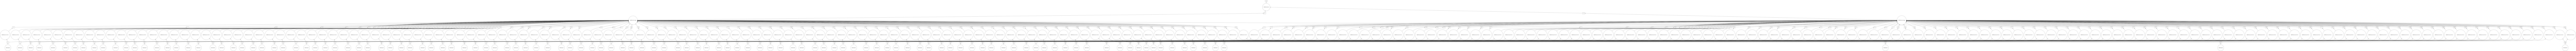

In [70]:
gps_df.visualize()

In [71]:
gps_df.compute()

x    2.731829e+06
y    5.801830e+06
dtype: float64

In [13]:
bound = 20026376.39
bounds = dict(x_range = (-bound, bound), y_range = (int(-bound*0.4), int(bound*0.6)))
plot_width = 900
plot_height = int(plot_width*0.5)

In [14]:
gps_df = dd.read_parquet('data/osm-1billion.parq')
gps_df

,x,y
npartitions=119,,
,float32,float32
,...,...
...,...,...
,...,...
,...,...


In [15]:
%%time
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, **bounds)
agg = cvs.points(gps_df, 'x', 'y', ds.count())

CPU times: user 47.1 s, sys: 1min 5s, total: 1min 52s
Wall time: 38.2 s


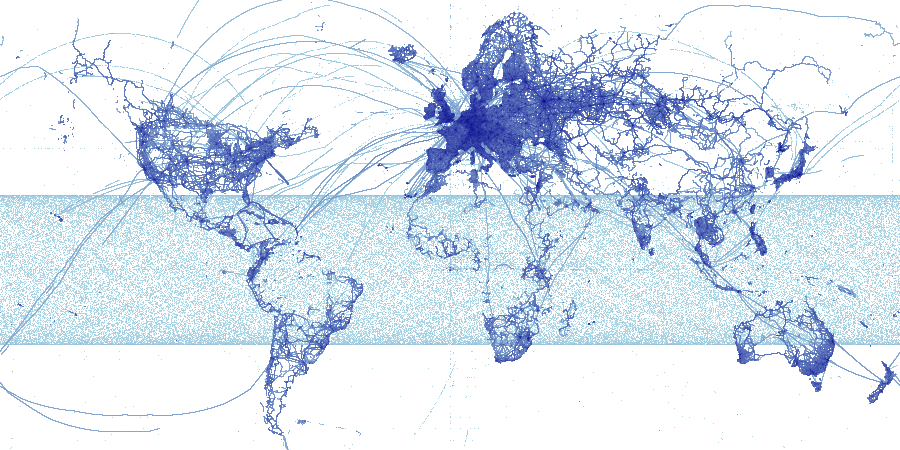

In [16]:
tf.shade(agg, cmap=["lightblue", "darkblue"], how='log')

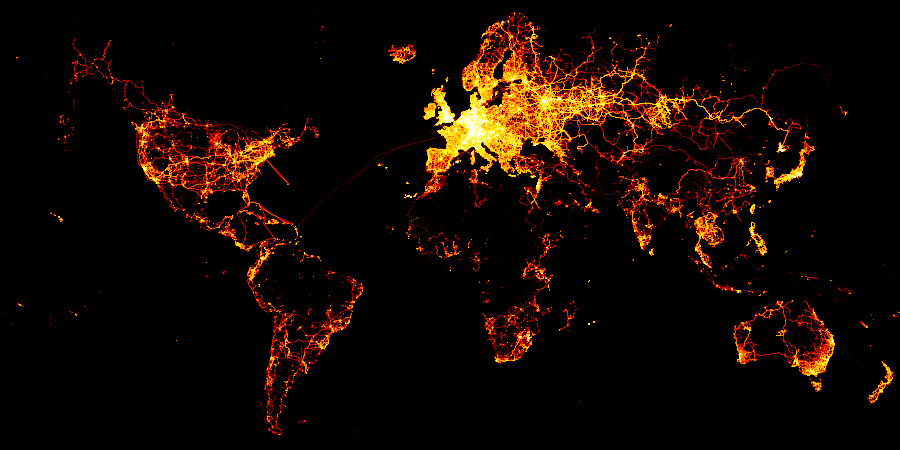

In [17]:
tf.set_background(tf.shade(agg, cmap=fire), "black")